In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('weather.csv')

In [3]:
#amin    20170101
#amax    20170921
# WDF5 = Direction of fastest 5-second wind
# WSF5 = Fastest 5-second wind
# SNWD: snow depth data
df

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.000000,0.000000,0.000000
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170404,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.000000
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170420,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.000000
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170120,69.08,82.04,NaN,3.355410,360.0,17.000744,0.000000,0.000000,0.000000
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170217,73.04,87.08,NaN,4.697574,360.0,19.908766,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416932,LAMONI MUNI AP,IA,40.6331,-93.9019,344.7,20170221,41.00,69.08,NaN,6.934514,NaN,NaN,NaN,NaN,0.000000
416933,SISSETON MUNI AP,SD,45.6689,-96.9914,353.9,20170102,16.16,26.24,NaN,8.947760,NaN,NaN,4.606302,3.149608,0.311024
416934,BOSCOBEL AP,WI,43.1561,-90.6775,204.8,20170606,46.04,80.96,NaN,2.908022,NaN,NaN,0.000000,0.000000,0.000000
416935,CHRISTIANSTED AP,VI,17.7028,-64.8056,18.6,20170914,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


In [4]:
# these groups only the 50 states into the four regions
D1 = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
D2 = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
D3 = ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'LA', 'OK', 'TX', 'AR']
D4 = ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']

In [5]:
df = df[df['state'].isin(D1+D2+D3+D4)]

In [6]:
df['region'] = df.apply(lambda r: 'Northeast' if r.state in D1 
                        else 'Midwest' if r.state in D2
                        else 'South' if r.state in D3
                        else 'West', axis=1)
                        

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
df

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP,region
7,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170207,-0.76,22.10,13.64,3.802798,360.0,14.092722,0.118110,22.047256,0.000000,West
8,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170330,37.04,53.96,44.24,4.026492,360.0,19.908766,0.000000,0.000000,0.070866,West
9,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170622,35.96,73.04,59.72,3.579104,360.0,19.013990,0.000000,0.000000,0.000000,West
10,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170725,53.06,87.08,71.60,6.039738,360.0,21.922012,0.000000,0.000000,0.000000,West
11,LAMAR MUNI AP,CO,38.0700,-102.6881,1129.0,20170129,26.24,64.94,NaN,13.197946,360.0,31.093466,0.000000,0.000000,0.000000,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416930,MARSHALLTOWN MUNI AP,IA,42.1128,-92.9175,296.9,20170221,29.12,62.96,NaN,6.934514,NaN,NaN,0.000000,0.000000,0.000000,Midwest
416931,AMES MUNI AP,IA,41.9922,-93.6217,283.5,20170221,29.12,64.04,NaN,7.605596,NaN,NaN,0.000000,0.000000,0.000000,Midwest
416932,LAMONI MUNI AP,IA,40.6331,-93.9019,344.7,20170221,41.00,69.08,NaN,6.934514,NaN,NaN,NaN,NaN,0.000000,Midwest
416933,SISSETON MUNI AP,SD,45.6689,-96.9914,353.9,20170102,16.16,26.24,NaN,8.947760,NaN,NaN,4.606302,3.149608,0.311024,Midwest


In [8]:
df1 = df.groupby(['state', df['date'].astype(str).str[:6]]).agg(
    tMonAvg=pd.NamedAgg(column='TAVG', aggfunc='mean'),
    sMonAvg=pd.NamedAgg(column='SNOW', aggfunc='mean'),
    pMonAvg=pd.NamedAgg(column='PRCP', aggfunc='mean'),
).reset_index()
df1.dropna(inplace=True)

In [9]:
df1

,state,date,tMonAvg,sMonAvg,pMonAvg
0,AK,201701,9.968648,0.430789,0.104087
1,AK,201702,14.072816,0.495595,0.088712
2,AK,201703,10.452816,0.259014,0.043438
3,AK,201704,35.322846,0.037367,0.036018
4,AK,201705,44.177581,0.023537,0.081620
...,...,...,...,...,...
445,WY,201705,42.291427,0.128300,0.076873
446,WY,201706,51.460692,0.000000,0.056949
447,WY,201707,60.303251,0.000000,0.036486
448,WY,201708,55.407370,0.000000,0.031746


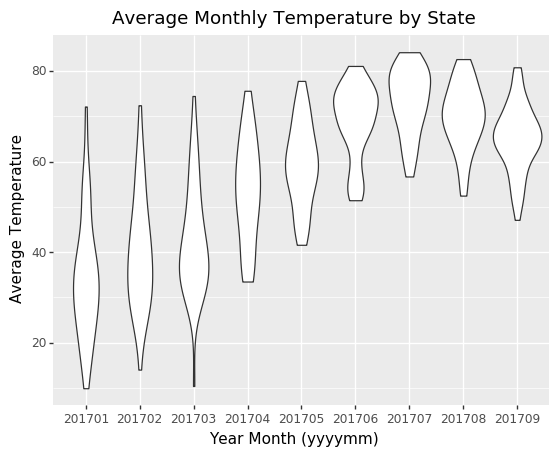

<ggplot: (-9223371838877654636)>

In [10]:
# violinplot of avg monthly temp over the year
ggplot(aes(x='factor(date)', y='tMonAvg'), data=df1) +\
    geom_violin() +\
    labs(title="Average Monthly Temperature by State",
         x = "Year Month (yyyymm)",
         y = "Average Temperature") #+\
#    geom_smooth(aes(group='state'), method="lm", se=False) +\
#    theme(figure_size=(8, 6))

In [11]:
# This takes the latitude and and cuts them into 10 intervals
df2 = df.copy()
df2['latitude'] = pd.cut(df2.latitude, 10)
df2 = df2.groupby(['latitude', df['date'].astype(str).str[:6]]).agg(
    TMAvg=pd.NamedAgg(column='TAVG', aggfunc='mean'),
    SMAvg=pd.NamedAgg(column='SNOW', aggfunc='mean'),
    PMAvg=pd.NamedAgg(column='PRCP', aggfunc='mean'),
).reset_index()
df2['latcode'] = df2.latitude.cat.codes
df2

,latitude,date,TMAvg,SMAvg,PMAvg,latcode
0,"(19.668, 24.876]",201701,72.309548,0.000000,0.062818,0
1,"(19.668, 24.876]",201702,72.777714,0.000000,0.131204,0
2,"(19.668, 24.876]",201703,74.389419,0.000000,0.071914,0
3,"(19.668, 24.876]",201704,75.993200,0.000000,0.116667,0
4,"(19.668, 24.876]",201705,77.429677,0.000000,0.053943,0
...,...,...,...,...,...,...
85,"(66.127, 71.283]",201705,39.658710,0.113454,0.020482,9
86,"(66.127, 71.283]",201706,52.556000,0.006562,0.016110,9
87,"(66.127, 71.283]",201707,57.611290,0.000000,0.064056,9
88,"(66.127, 71.283]",201708,47.525484,0.009727,0.100251,9


[Text(0, 0, 'zero'),
 Text(0, 0, '(19.668, 24.876]'),
 Text(0, 0, '(30.032, 35.188]'),
 Text(0, 0, '(40.345, 45.501]'),
 Text(0, 0, '(50.658, 55.814]'),
 Text(0, 0, '(60.97, 66.127]')]

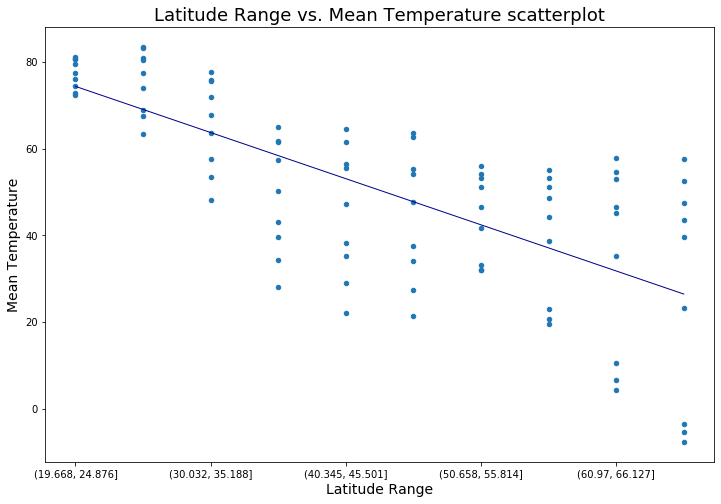

In [12]:
ax2 = df2.plot(kind='scatter', x='latcode', y='TMAvg', figsize=(12, 8))
fit = np.polyfit(df2.latcode, df2.TMAvg, 1)
plt.plot(df2.latcode, fit[0] * df2.latcode + fit[1], color='darkblue', linewidth=1)
ax2.set_title('Latitude Range vs. Mean Temperature scatterplot', fontsize=18)
ax2.set_xlabel('Latitude Range', fontsize=14)
ax2.set_ylabel('Mean Temperature', fontsize=14)
ax2.set_xticklabels(['zero']+[df2.latitude.unique()[2*x] for x in range(5)])

[Text(0, 0, 'zero'),
 Text(0, 0, '(19.668, 24.876]'),
 Text(0, 0, '(30.032, 35.188]'),
 Text(0, 0, '(40.345, 45.501]'),
 Text(0, 0, '(50.658, 55.814]'),
 Text(0, 0, '(60.97, 66.127]')]

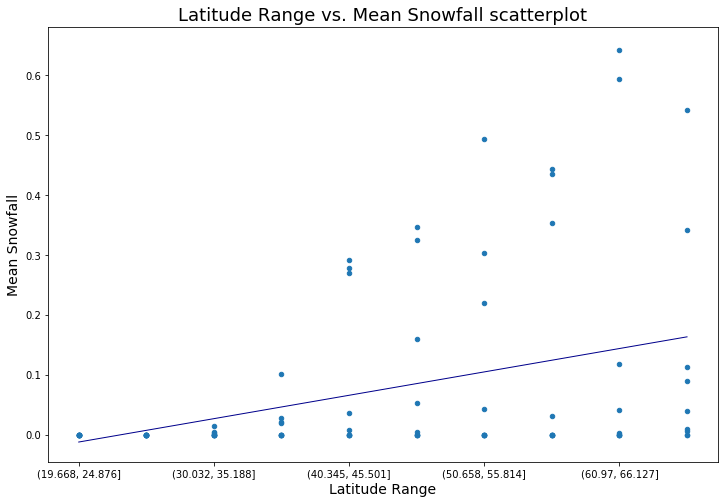

In [13]:
ax21 = df2.plot(kind='scatter', x='latcode', y='SMAvg', figsize=(12, 8))
fit = np.polyfit(df2.latcode, df2.SMAvg, 1)
plt.plot(df2.latcode, fit[0] * df2.latcode + fit[1], color='darkblue', linewidth=1)
ax21.set_title('Latitude Range vs. Mean Snowfall scatterplot', fontsize=18)
ax21.set_xlabel('Latitude Range', fontsize=14)
ax21.set_ylabel('Mean Snowfall', fontsize=14)
ax21.set_xticklabels(['zero']+[df2.latitude.unique()[2*x] for x in range(5)])

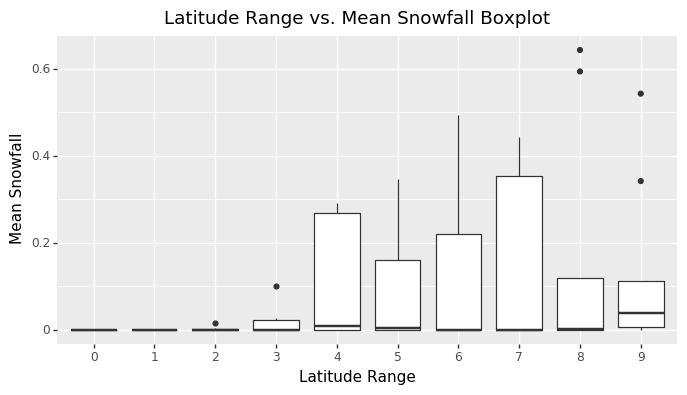

<ggplot: (-9223371838883129372)>

In [14]:
ggplot(aes(x='factor(latcode)', y='SMAvg'), data=df2) +\
    geom_boxplot() +\
    labs(title="Latitude Range vs. Mean Snowfall Boxplot",
         x = "Latitude Range",
         y = "Mean Snowfall") +\
    theme(figure_size=(8, 4)) #+\
    #scale_x_discrete(labels=df2.latitude.unique())

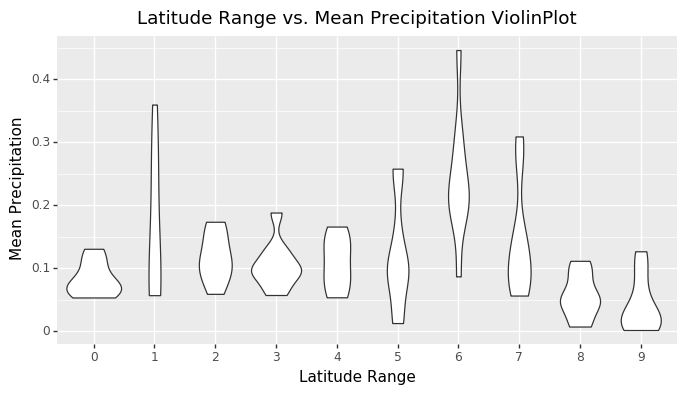

<ggplot: (-9223371838882034000)>

In [15]:
ggplot(aes(x='factor(latcode)', y='PMAvg'), data=df2) +\
    geom_violin() +\
    labs(title="Latitude Range vs. Mean Precipitation ViolinPlot",
         x = "Latitude Range",
         y = "Mean Precipitation") +\
    theme(figure_size=(8, 4))